In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 1/(25*x**2+1)

In [3]:
def Markov(M, f, seed):
    np.random.seed(seed) #for reproducibility
    true_val=np.arctan(5)/5
    
    X=np.random.uniform(size=M)
    
    f_array=np.array([f(x) for x in X])
    est_value=np.mean(f_array)
    
    return np.abs(est_value-true_val)

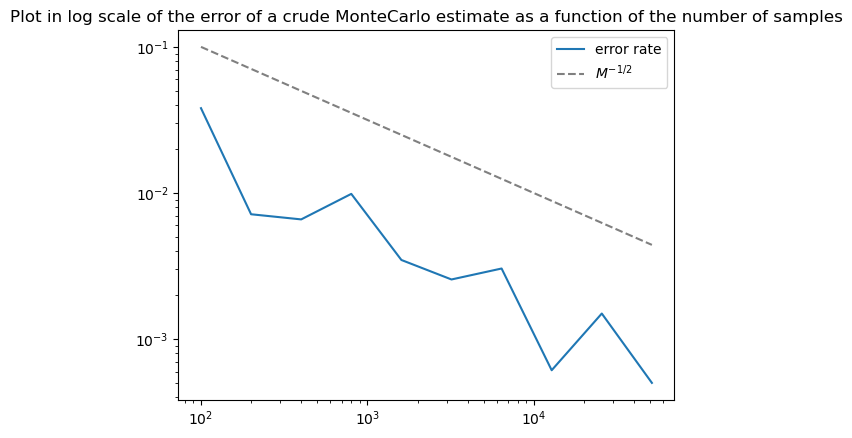

In [4]:
seed=9001 #for reproducibility

M_array= np.array([50*2**i for i in range(1,11)])

error_function=np.array([Markov(m, f, seed) for m in M_array])

plt.loglog(M_array, error_function, label='error rate')
plt.loglog(M_array, M_array**-0.5, '--', label = r'$M^{-1/2}$',color='gray')
plt.title("Plot in log scale of the error of a crude MonteCarlo estimate as a function of the number of samples")
plt.legend()
plt.show()

*Comment*: Looks nice, converges with rate M^{-0.5} as states the theory

#### Part b)

*Comment*: After hesitating between using scipy and numpy, choosing numpy

In [5]:
import numpy.polynomial.legendre as L

In [6]:
def degree(n):
    if n!=0:
        list_=[0]*(n+1)
        list_[-1]=1
        return list_
    if n==0:
        return [1,0] #small fix, [1,0] is equivalent to [1] but they didn't like [1]

In [7]:
def coefficient(M, N, seed):
    np.random.seed(seed) #for reproducibility
    X=np.random.uniform(size=M)
    V, cond_V=V_mat(M, N, X)
    f_eval=np.array([-f(x) for x in X])
    c_coeff,_,_,_=np.linalg.lstsq(V,f_eval, rcond=None)
    return c_coeff, cond_V

In [8]:
def V_mat(M, N, X):
    V=np.ones((M,N+1))
    for i in range(1,N+1):
        l_i=L.Legendre(degree(i), domain=[0,1])
        V[:,i]=[l_i(x) for x in X]
    return V, np.linalg.cond(V)

In [9]:
def IMCLS_prime(M,N, seed):
    true_val=np.arctan(5)/5
    c_coeff, cond_V=coefficient(M, N, seed)
    IMCLS_prime_val=c_coeff[0]
    return np.abs(true_val-IMCLS_prime_val), cond_V

In [10]:
M=50*2**5
N=5

IMCLS_prime(M,N, 9009)

(0.5495861496499239, 3.3458917684317693)

In [11]:
def IMCLS(M, N, seed_1, seed_2):
    
    np.random.seed(seed_1)
    X=np.random.uniform(size=M)
    c_coeff, cond_V=coefficient(M, N, seed_2)
    l_array=lambda x,n: np.array([L.Legendre(degree(j), domain=[0,1])(x) for j in range(0,n+1)])
    f_array=np.array([f(x)-c_coeff@l_array(x, N) for x in X])
    
    IMCLS_value=np.mean(f_array)+c_coeff[0]
    true_val=np.arctan(5)/5
    
    return np.abs(IMCLS_value-true_val), cond_V

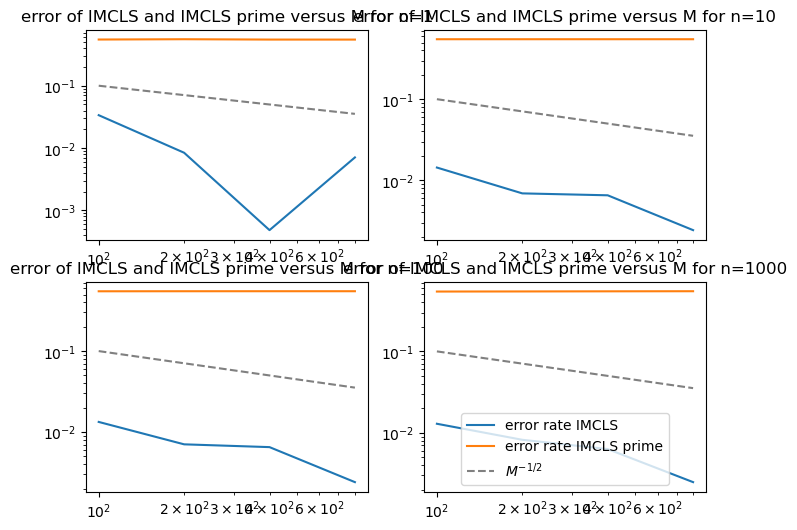

In [13]:
fig, ax = plt.subplots(2,figsize= (8,6), sharey = False, sharex = False)

N=[[1,2],[3,4]] #change to [[1,5], [15,30]]
M_array=np.array([50*2**i for i in range(1,5)]) #keep like that or modify to (1,11)

seed_1=9009
seed_2=7007

for i in range(2):
    sbplt = ax[i]
    cond_V=[]
    error_function_IMCLS=[]
    error_function_IMCLS_prime=[]
        
    for m in M_array:
        e_IMCLS, c_v=IMCLS(m, N[i][j], seed_1, seed_2)
        
        e_IMCLS_prime, _=IMCLS_prime(m,N[i][j], seed_2)
        cond_V.append(c_v)
        error_function_IMCLS.append(e_IMCLS)
        error_function_IMCLS_prime.append(e_IMCLS_prime)

    sbplt.loglog(M_array, error_function_IMCLS, label='error rate IMCLS')
    sbplt.loglog(M_array, error_function_IMCLS_prime, label='error rate IMCLS prime')
    sbplt.loglog(M_array, M_array**-0.5, '--', label = r'$M^{-1/2}$',color='gray')
    sbplt.set_title("error of IMCLS and IMCLS prime versus M for n="+str(N[i][j]))
        
plt.legend()
plt.show()
        
fig.tight_layout()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

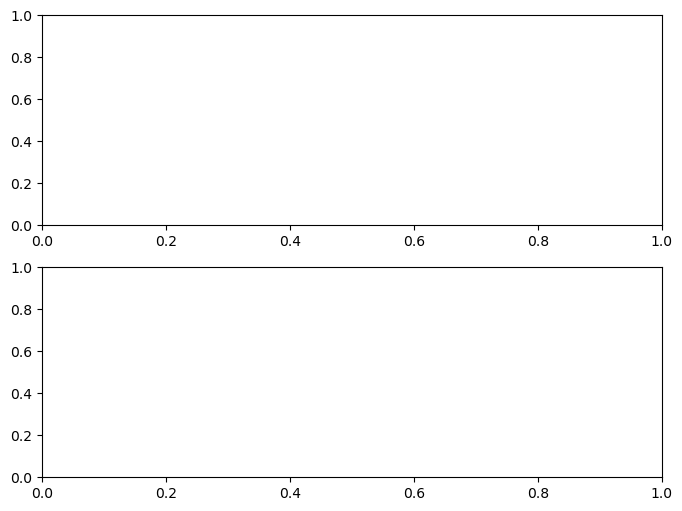

In [14]:
fig, ax = plt.subplots(2,figsize= (8,6), sharey = False, sharex = False)


M_array=np.array([50*2**i for i in range(1,11)])

seed_1=9009
seed_2=7007

#for n=⌈sqrt(M)⌉
N_func_1=lambda m: np.ceil(np.sqrt(m))
sbplt = ax[i]
        
error_function_IMCLS_=np.array([IMCLS(m, N_func_1(m), seed_1, seed_2) for m in M_array])
error_function_IMCLS_prime_=np.array([IMCLS_prime(m,N_func_1(m), seed_2) for m in M_array])

sbplt.loglog(M_array, error_function_IMCLS_, label='error rate IMCLS')
sbplt.loglog(M_array, error_function_IMCLS_prime_, label='error rate IMCLS prime')
sbplt.loglog(M_array, M_array**-0.5, '--', label = r'$M^{-1/2}$',color='gray')
sbplt.set_title("error of IMCLS and IMCLS prime versus M for n=⌈sqrt(M)⌉")

#for n=⌈M/2⌉
N_func_2=lambda m: np.ceil(m/2)
sbplt = ax[i]
        
error_function_IMCLS_2=np.array([IMCLS(m, N_func_2(m), seed_1, seed_2) for m in M_array])
error_function_IMCLS_prime_2=np.array([IMCLS_prime(m,N_func_2(m), seed_2) for m in M_array])

sbplt.loglog(M_array, error_function_IMCLS_2, label='error rate IMCLS')
sbplt.loglog(M_array, error_function_IMCLS_prime_2, label='error rate IMCLS prime')
sbplt.loglog(M_array, M_array**-0.5, '--', label = r'$M^{-1/2}$',color='gray')
sbplt.set_title("error of IMCLS and IMCLS prime versus M for n=⌈sqrt(M)⌉")
        
plt.legend()
plt.show()
        
fig.tight_layout()